<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compustat" data-toc-modified-id="Compustat-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compustat</a></span></li><li><span><a href="#How-is-the-fundamentals-data-organized?" data-toc-modified-id="How-is-the-fundamentals-data-organized?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How is the fundamentals data organized?</a></span><ul class="toc-item"><li><span><a href="#All-tables-in-comp" data-toc-modified-id="All-tables-in-comp-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All tables in comp</a></span></li><li><span><a href="#All-variables-in-comp.funda" data-toc-modified-id="All-variables-in-comp.funda-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>All variables in comp.funda</a></span></li><li><span><a href="#Variable-definitions" data-toc-modified-id="Variable-definitions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variable definitions</a></span></li><li><span><a href="#Download-Compustat-FUNDA" data-toc-modified-id="Download-Compustat-FUNDA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Download Compustat FUNDA</a></span></li></ul></li><li><span><a href="#Primary-Keys" data-toc-modified-id="Primary-Keys-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Primary Keys</a></span></li><li><span><a href="#Calculate-Variables-of-Interest" data-toc-modified-id="Calculate-Variables-of-Interest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calculate Variables of Interest</a></span><ul class="toc-item"><li><span><a href="#Book-Equity" data-toc-modified-id="Book-Equity-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Book Equity</a></span></li><li><span><a href="#Operating-Profitability-(OPBE)" data-toc-modified-id="Operating-Profitability-(OPBE)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Operating Profitability (OPBE)</a></span></li><li><span><a href="#Investment-(INV)" data-toc-modified-id="Investment-(INV)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Investment (INV)</a></span><ul class="toc-item"><li><span><a href="#Is-Asset-Growth-Investment?" data-toc-modified-id="Is-Asset-Growth-Investment?-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Is Asset Growth Investment?</a></span></li></ul></li></ul></li><li><span><a href="#Save-Output" data-toc-modified-id="Save-Output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save Output</a></span></li><li><span><a href="#For-next-class" data-toc-modified-id="For-next-class-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>For next class</a></span></li></ul></div>

# Big Data in Finance: Part II <BR><BR> Lecture 3: Compustat 
    
**Instructor** <BR>
Ritt Keerati, ritt.keerati@gsb.columbia.edu
    
**TA's:** <BR>
Meha Sadasivam, MSadasivam21@gsb.columbia.edu <BR>
Daheng Yang, dyang22@gsb.columbia.edu<BR>


<sub> Credit: lecture notes originally developed by Lira Mota

## Compustat

In this section we are going to:
1. Download a set of US firm's annual fundamentals;
2. Understand how the data is organized:
    1. Primary keys;
    2. Secondary keys;
    3. Data frequency;
    4. Others.        
2. Clean the data;
3. Construct important variables:
    1. Book Equity Value
    2. Asset Growth
    3. Operational Profitability

## How is the fundamentals data organized?

* We can display all tables in "comp" library
* We are going to focus on the "funda" table: annual fundamentals
* Others that are interesting to know: "namesd"

**Setup**

In [1]:
%matplotlib inline 

# Packages 
import wrds
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
plt.rcParams['figure.figsize'] = [10, 6]
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 

In [2]:
# Set WRDS Connection
db = wrds.Connection(wrds_username='rkeerati') # make sure to configure wrds connector before hand.

Loading library list...
Done


### All tables in comp

In [3]:
comp_tables = db.list_tables(library="comp")

In [4]:
 pd.DataFrame({'tables':comp_tables}).head(100) # Transform libs to a Pandas data frame to have a better display

,tables
0,aco_amda
1,aco_imda
2,aco_indfnta
3,aco_indfntq
4,aco_indfntytd
5,aco_indsta
6,aco_indstq
7,aco_indstytd
8,aco_notesa
9,aco_notesq


### All variables in comp.funda

In [5]:
db.describe_table(library="comp", table="funda")

Approximately 848271 rows in comp.funda.


,name,nullable,type
0,gvkey,True,VARCHAR(6)
1,datadate,True,DATE
2,fyear,True,DOUBLE_PRECISION
3,indfmt,True,VARCHAR(12)
4,consol,True,VARCHAR(2)
...,...,...,...
943,au,True,VARCHAR(8)
944,auop,True,VARCHAR(8)
945,auopic,True,VARCHAR(1)
946,ceoso,True,VARCHAR(1)


### Variable definitions
1. [Xpressfeed Data Items](https://w3.loibl.com/uni/xf_understanding_the_data.pdf)
2. WRDS [website](https://wrds-www.wharton.upenn.edu/pages/get-data/compustat-capital-iq-standard-poors/compustat/north-america-daily/fundamentals-annual/): go to the (?) sign
3. What if we want to replicate a paper that says:

   "Earnings (E) is income before extraordinary items (Item 18) plus income statement deferred taxes (Item 50) minus preferred dividends (Item 19), if earnings are positive;" [Baker and Wurgler, JF 2006](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1540-6261.2006.00885.x)

    * All previous documentation does not contain ITEM numbers
    * These are the legacy CST item numbers
    * You can find item reference [here](https://www.crsp.org/products/documentation/annual-data-industrial).
    
    

**Objective**

Create a data frame with company fundamentals necessary to replicate FF 2015:

1. Book Equity (BE)
2. Operating Profits (OP)
3. Investment (INV)

**Choose variables of interest**

Compustat XpressFeed Variables 1/5:  
* AT      = Total Assets  
* CAPX    = Capital Expenditures  
* CEQ     = Common/Ordinary Equity - Total 
* COGS    = Cost of Goods Sold
* CSHO    = Common Shares Outstanding
* DLC     = Debt in Current Liabilities 
* DLCCH   = Current Debt - Changes
* DLTT    = Long-Term Debt - Total

Compustat XpressFeed Variables 2/5:
* DP      = Depreciation and Amortization
* DVC     = Divdends common/ordinary  
* DVP     = Dividends - Preferred/Preference
* GP      = Gross Profits
* IB      = Income Before Extraordinary Items
* ICAPT   = Invested Capital - Total
* ITCB    = Investment Tax Credit (Balance Sheet)  
* LT      = Total Liabilities

Compustat XpressFeed Variables 3/5:
* MIB     = Minority Interest (Balance Sheet)
* NAICS   = North American Industrial Classification System Variable Name
* NAICSH  = North American Industry Classification Codes - Historical Company Variable Name
* NI      = Net Income
* PPEGT   = "Property, Plant and Equipment - Total (Gross)"
* PRBA    = Postretirement Benefit Assets (from separate pension annual file) 
* PRSTKCC = Purchase of Common Stock (Cash Flow)                   
* PSTKRV  = Preferred Stock Redemption Value

Compustat XpressFeed Variables 4/5:
* PSTK    = Preferred/Preference Stock (Capital) - Total (kd: = par?)               
* PSTKL   = Preferred Stock Liquidating Value     
* PSTKRV  = Preferred Stock Liquidating Value          
* RE      = Retained Earnings
* REVT    = Revenue - Total
* SALE    = Sales/Turnover Net
* SEQ     = Shareholders Equity   
* SIC     = Standard Industrial Classification Code

Compustat XpressFeed Variables 5/5:
* TXDB    = Deferred Taxes Balance Sheet
* TXDI    = Income Taxes - Deferred
* TXDITC  = Deferred Taxes and Investment Tax Credit                        
* WCAPCH  = Working Capital Change - Total
* XINT    = Interest and Related Expense - Total 
* XLR     = Staff Expense - Total
* XRD     = Research and Development Expense 
* XSGAQ   = Selling, General and Administrative Expenses (millions)  

### Download Compustat FUNDA

In [6]:
fund_table = 'funda'
varlist = ['conm', 'tic', 'cusip','fyear', 'fyr', 'at','capx', 'ceq', 'cogs', 'csho', 'dlc', 'dlcch','dltt', 'dp', 'ib', 'itcb', 
           'lt', 'mib', 'naicsh', 'ni', 'prstkcc', 'pstk', 'pstkl', 'pstkrv', 're', 'revt', 'sale', 
           'seq', 'sich', 'txdb', 'txdi', 'txditc', 'wcapch', 'xint', 'xlr', 'xrd', 'xsga']
query = """SELECT gvkey, datadate, {}
           FROM comp.{}
           WHERE datafmt = 'STD'
           AND popsrc = 'D'
           AND indfmt = 'INDL'
           AND consol = 'C'
           AND fyear>=1980;""".format(", ".join(varlist), fund_table)

compa = db.raw_sql(query, date_cols=['datadate'])
del(fund_table, varlist, query)

**Look at the data**

In [7]:
compa.head()  

,gvkey,datadate,conm,tic,cusip,fyear,fyr,at,capx,ceq,...,seq,sich,txdb,txdi,txditc,wcapch,xint,xlr,xrd,xsga
0,001001,1980-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1980.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001001,1981-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1981.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001001,1982-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1982.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001001,1983-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1983.0,12.0,14.080,3.367,7.823,...,7.823,NaN,0.000,0.144,0.000,3.618,0.763,NaN,0.0,16.435
4,001001,1984-12-31,A & M FOOD SERVICES INC,AMFD.,000165100,1984.0,12.0,16.267,5.496,8.962,...,8.962,NaN,0.357,0.275,0.357,-2.993,0.661,NaN,NaN,20.628


In [8]:
# Missing data?
compa['at'].isnull().mean()

0.16527477899539658

In [9]:
# Number of companies
compa.gvkey.nunique()

39483

In [10]:
compa.groupby('fyear').gvkey.nunique()

fyear
1980.0     6889
1981.0     7058
1982.0     7685
1983.0     7996
1984.0     8243
1985.0     8599
1986.0     9017
1987.0     9225
1988.0     9333
1989.0     9343
1990.0     9571
1991.0     9966
1992.0    10705
1993.0    11482
1994.0    11899
1995.0    12492
1996.0    12624
1997.0    12438
1998.0    12555
1999.0    12531
2000.0    12093
2001.0    11584
2002.0    11251
2003.0    11064
2004.0    10898
2005.0    10854
2006.0    10876
2007.0    10870
2008.0    10680
2009.0    10631
2010.0    10853
2011.0    11530
2012.0    11835
2013.0    11828
2014.0    11636
2015.0    11468
2016.0    11329
2017.0    11243
2018.0    11302
2019.0    11274
2020.0    11090
2021.0     5993
Name: gvkey, dtype: int64

## Primary Keys


* We are looking at Annual data
* Logic says that that we should have one company (gvkey) per year (fyear)
* But remember, the primary key for funda is (gvkey and datadate)
* Question: Can a firm have two datadate for the same year?


In [11]:
# Check if we have the right PK
compa.duplicated(['gvkey', 'datadate']).sum()

0

In [12]:
# Is (gvkey, fyear) PK?
compa[compa.duplicated(['gvkey', 'fyear'])]

,gvkey,datadate,conm,tic,cusip,fyear,fyr,at,capx,ceq,...,seq,sich,txdb,txdi,txditc,wcapch,xint,xlr,xrd,xsga
65734,006557,1982-12-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1982.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65736,006557,1983-12-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1983.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288462,039310,2021-01-31,VICTORIAS SECRET AND CO,VSCO,926400102,2020.0,1.0,4229.0,127.0,891.0,...,891.0,5621.0,19.0,-64.0,19.0,NaN,6.0,NaN,0.0,1621.0
325542,066552,2015-12-31,BIO LAB NATURALS INC,BLAB,090622200,2015.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325546,066552,2016-12-31,BIO LAB NATURALS INC,BLAB,090622200,2016.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325550,066552,2017-12-31,BIO LAB NATURALS INC,BLAB,090622200,2017.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325552,066552,2018-12-31,BIO LAB NATURALS INC,BLAB,090622200,2018.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325560,066552,2019-12-31,BIO LAB NATURALS INC,BLAB,090622200,2019.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325570,066552,2010-12-31,BIO LAB NATURALS INC,BLAB,090622200,2010.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325572,066552,2011-12-31,BIO LAB NATURALS INC,BLAB,090622200,2011.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
compa[compa.gvkey=='006557'].head(10)

,gvkey,datadate,conm,tic,cusip,fyear,fyr,at,capx,ceq,...,seq,sich,txdb,txdi,txditc,wcapch,xint,xlr,xrd,xsga
65731,006557,1980-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1980.0,8.0,201.266,38.344,50.957,...,73.039,NaN,14.636,3.474,14.636,NaN,7.208,NaN,NaN,NaN
65732,006557,1981-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1981.0,8.0,242.081,53.382,59.995,...,81.481,NaN,18.192,3.276,18.192,NaN,11.743,NaN,NaN,NaN
65733,006557,1982-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1982.0,8.0,251.360,47.089,63.491,...,84.314,NaN,19.938,2.672,19.938,13.777,14.309,NaN,NaN,NaN
65734,006557,1982-12-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1982.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65735,006557,1983-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1983.0,8.0,328.891,78.264,103.481,...,120.161,NaN,25.469,5.533,25.469,3.109,8.879,NaN,NaN,17.218
65736,006557,1983-12-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1983.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65737,006557,1984-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1984.0,8.0,426.880,93.098,177.188,...,191.757,NaN,31.525,7.398,31.525,19.261,10.364,NaN,NaN,24.115
65738,006557,1985-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1985.0,8.0,652.477,149.695,225.685,...,357.124,NaN,34.765,7.129,34.765,111.813,15.567,NaN,NaN,32.761
65739,006557,1986-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1986.0,8.0,901.769,149.687,406.137,...,537.574,NaN,36.442,14.026,36.442,NaN,20.606,NaN,NaN,43.760
65740,006557,1987-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1987.0,8.0,1655.019,242.522,821.060,...,1138.647,4953.0,38.797,14.087,38.797,NaN,41.287,NaN,NaN,71.831


In [14]:
# Check duplicates
compa[compa.duplicated(['gvkey', 'fyear'], keep='last')]

,gvkey,datadate,conm,tic,cusip,fyear,fyr,at,capx,ceq,...,seq,sich,txdb,txdi,txditc,wcapch,xint,xlr,xrd,xsga
65733,006557,1982-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1982.0,8.0,251.360,47.089,63.491,...,84.314,NaN,19.938,2.672,19.938,13.777,14.309,NaN,NaN,NaN
65735,006557,1983-08-31,LAIDLAW INTERNATIONAL INC,LI.3,50730R102,1983.0,8.0,328.891,78.264,103.481,...,120.161,NaN,25.469,5.533,25.469,3.109,8.879,NaN,NaN,17.218
288461,039310,2020-12-31,VICTORIAS SECRET AND CO,VSCO,926400102,2020.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325540,066552,2014-12-31,BIO LAB NATURALS INC,BLAB,090622200,2014.0,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325541,066552,2015-06-30,BIO LAB NATURALS INC,BLAB,090622200,2015.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325545,066552,2016-06-30,BIO LAB NATURALS INC,BLAB,090622200,2016.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325547,066552,2017-06-30,BIO LAB NATURALS INC,BLAB,090622200,2017.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325551,066552,2018-06-30,BIO LAB NATURALS INC,BLAB,090622200,2018.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325556,066552,2019-06-30,BIO LAB NATURALS INC,BLAB,090622200,2019.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325569,066552,2010-06-30,BIO LAB NATURALS INC,BLAB,090622200,2010.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Example of a company that have two reports for the same year
compa.loc[compa.gvkey=='006557',['gvkey','datadate','fyear','fyr','conm', 'at']].head(10)

,gvkey,datadate,fyear,fyr,conm,at
65731,006557,1980-08-31,1980.0,8.0,LAIDLAW INTERNATIONAL INC,201.266
65732,006557,1981-08-31,1981.0,8.0,LAIDLAW INTERNATIONAL INC,242.081
65733,006557,1982-08-31,1982.0,8.0,LAIDLAW INTERNATIONAL INC,251.360
65734,006557,1982-12-31,1982.0,12.0,LAIDLAW INTERNATIONAL INC,NaN
65735,006557,1983-08-31,1983.0,8.0,LAIDLAW INTERNATIONAL INC,328.891
65736,006557,1983-12-31,1983.0,12.0,LAIDLAW INTERNATIONAL INC,NaN
65737,006557,1984-08-31,1984.0,8.0,LAIDLAW INTERNATIONAL INC,426.880
65738,006557,1985-08-31,1985.0,8.0,LAIDLAW INTERNATIONAL INC,652.477
65739,006557,1986-08-31,1986.0,8.0,LAIDLAW INTERNATIONAL INC,901.769
65740,006557,1987-08-31,1987.0,8.0,LAIDLAW INTERNATIONAL INC,1655.019


In [16]:
# How to deal with duplicates? Keep entry with available data
compa.dropna(subset=['fyear'], inplace=True)
compa.sort_values(['gvkey','fyear', 'at'], inplace=True)
compa = compa[~compa.duplicated(['gvkey', 'fyear'], keep='first')]

In [17]:
# Always check your result
compa.duplicated(['gvkey', 'fyear']).sum()

0

## Calculate Variables of Interest

### Book Equity

Daniel, Mota, Rottke, Santos (RFS, 2020) BE definition:

Stockholders book equity, minus the book value of preferred stock, plus balance sheet deferred taxes (if available and fiscal year is < 1993), minus investment tax credit (if available), minus post-retirement benefit assets (PRBA) if available. 

Stockholders book equity is shareholder equity (SEQ), common equity (CEQ) plus preferred stock (PSTK) or total
assets (AT) minus liabilities (LT) plus minority interest (MIB, if available) (depending on availability, in that order). 

Book value of preferred stock is redemption (PSTKRV), liquidation (PSTKL), or par value (PSTK) (depending on availability, in that order). 

Deferred taxes is deferred taxes and investment tax credit (TXDITC) or deferred taxes and investment tax credit (TXDB) plus investment tax credit (ITCB) (depending on availability, in that order).


In [18]:
# Calculating BE
# Shareholder Equity
compa['se'] = compa['seq']

# Uses Common Equity (ceq) + Preferred Stock (pstk) if SEQ is missing:
compa['se'].fillna((compa['ceq'] + compa['pstk']), inplace=True)

# Uses Total Assets (at) - Liabilities (lt) + Minority Interest (mib, if available), if others are missing
compa['se'].fillna((compa['at'] - compa['lt'] + compa['mib'].fillna(0)), inplace=True)

In [19]:
# Preferred Stock
# Preferred Stock (Redemption Value)
compa['ps'] = compa['pstkrv']

# Uses Preferred Stock (Liquidating Value (pstkl)) if Preferred Stock (Redemption Value) is missing
compa['ps'].fillna(compa['pstkl'], inplace=True)

# Uses Preferred Stock (Carrying Value (pstk)) if others are missing
compa['ps'].fillna(compa['pstk'], inplace=True)

In [20]:
# Deferred Taxes
# Uses Deferred Taxes and Investment Tax Credit (txditc)
compa['dt'] = compa['txditc']

# This was Novy-Marx old legacy code. We drop this part to be in accordance with Ken French.
# Uses Deferred Taxes and Investment Tax Credit(txdb) + Investment Tax Credit (Balance Sheet) (itcb) if txditc is missing
compa['dt'].fillna((compa['txdb'].fillna(0) + compa['itcb'].fillna(0)), inplace=True)
# If all measures are missing, set n  to missing
compa.loc[pd.isnull(compa['txditc']) & pd.isnull(compa['txdb']) & pd.isnull(compa['itcb']), 'dt'] = np.nan

compa.loc[compa['fyear'] >= 1993, 'dt'] = 0

In [21]:
# Book Equity
# Book Equity (BE) = Share Equity (se) - Prefered Stocks (ps) + Deferred Taxes (dt)
compa['be'] = (compa['se']  # shareholder equity must be available, otherwise BE is missing
               - compa['ps']  # preferred stock must be available, otherwise BE is missing
               + compa['dt'].fillna(0))  # add deferred taxes if available
               #- compa['prba'].fillna(0))  # subtract postretirement benefit assets if available

**Look at your data**

In [22]:
# Missings
compa.be.isnull().mean()  

0.16701332856531767

<AxesSubplot:>

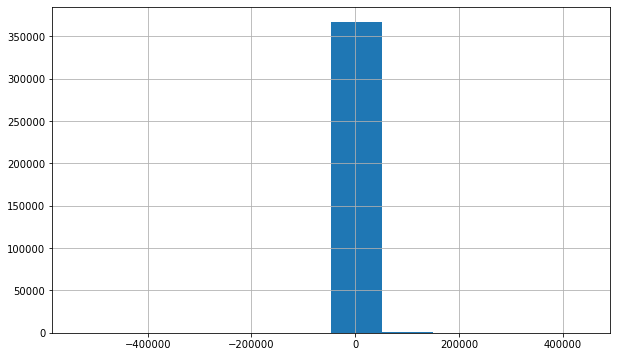

In [23]:
compa.be.hist() 

In [24]:
# Does it make sense to have a negative BE?
(compa.be<0).mean()   

0.09733994518290848

<AxesSubplot:>

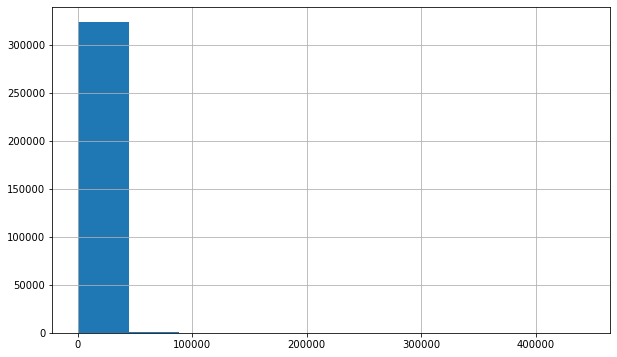

In [25]:
compa[compa.be>0].be.hist()

<AxesSubplot:>

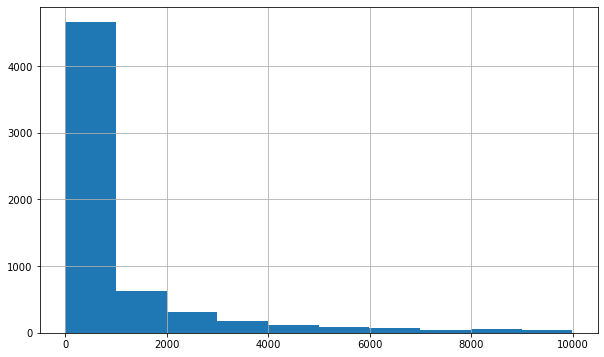

In [26]:
compa[(compa.be>0)&(compa.be<10e3)&(compa.fyear==2020)].be.hist()

### Operating Profitability (OPBE)

Daniel, Mota, Rottke, Santos (RFS, 2020) OPBE definition:

Operating profits to book equity (BE) ratio. 

Operating profits is sales (SALE) minus cost of goods sold (COGS), minus selling, general, and administrative expenses (XSGA),
minus interest expense (XINT). In order to be non-missing, SALE must be non-missing, at least one of the other entries must be non-missing and BE must be greater than zero.

In [27]:
# COST = COGS + XSGA + XINT 
compa['cost'] = compa[['cogs', 'xsga', 'xint']].sum(axis=1, skipna=True)
compa.loc[compa[['cogs', 'xsga', 'xint']].isnull().all(axis=1), 'cost'] = np.nan

In [28]:
# OP = SALE - COST    
compa['op'] = compa['sale']-compa['cost']

**Always look at your data...**

In [29]:
# Look at missings
compa.op.isnull().mean()

0.17118685114058932

<AxesSubplot:>

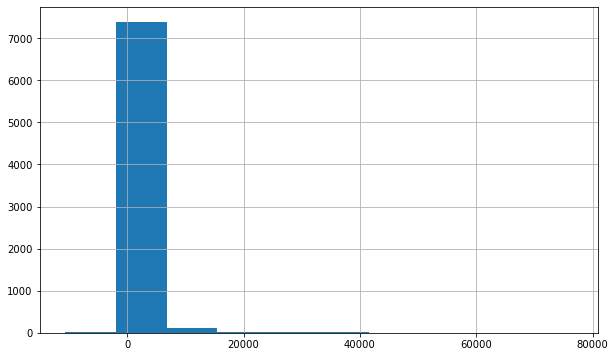

In [30]:
compa[compa.fyear==2020].op.hist()

In [31]:
# Which was the most profitable company in 2020?
compa.loc[compa[compa.fyear==2021].op.idxmax(),['gvkey','conm','op','be','at']]

gvkey       001690
conm     APPLE INC
op        117588.0
be         63090.0
at        351002.0
Name: 8117, dtype: object

<AxesSubplot:title={'center':"Apple's OP"}, xlabel='fyear'>

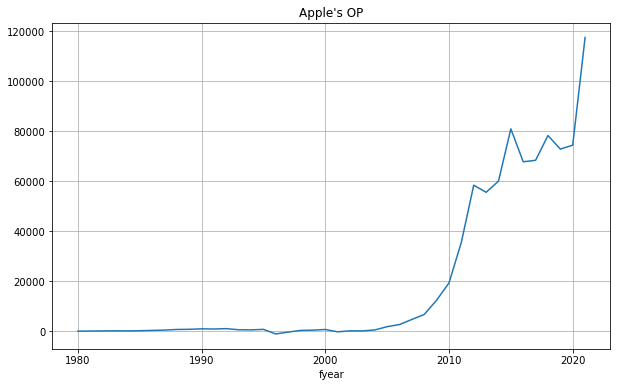

In [32]:
# Plot
compa[compa.gvkey=='001690'].set_index('fyear').op.plot(title = "Apple's OP", grid=True)

In [33]:
# Calculate OPBE
compa.loc[(compa.be > 0), 'opbe'] = compa['op']/compa['be']

**What do we do now?**

Look at the data...

In [34]:
# Look at missings
compa.opbe.isnull().mean()

0.2701178952228557

<AxesSubplot:>

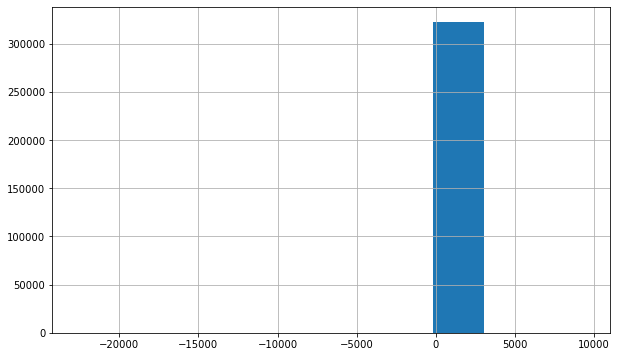

In [35]:
# Be careful with ratios
compa.opbe.hist()

<AxesSubplot:title={'center':"Apple's OPBE"}, xlabel='fyear'>

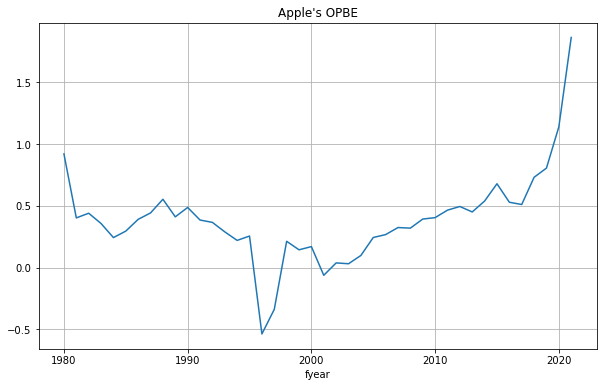

In [36]:
# Plot
compa[compa.gvkey=='001690'].set_index('fyear').opbe.plot(title = "Apple's OPBE", grid=True)

### Investment (INV)

Daniel, Mota, Rottke, Santos (RFS, 2020) OP definition:

Total asset (AT) growth $(AT_t/AT_{t-1} - 1)$. 

We consider PERMCO as company's identification key. AT must be greater than zero to be not missing.


In [37]:
# Calculate lag assets and investment
compa.sort_values(['gvkey', 'fyear'], inplace=True)
compa['at_lag'] = compa.groupby('gvkey').at.shift(1)
compa['inv'] = (compa['at'] - compa['at_lag']) / compa['at_lag']

In [38]:
compa.inv.max()

inf

In [39]:
compa.inv.min()

-1.0

In [40]:
compa.loc[compa.at_lag==0, 'inv'] = np.nan

What if compa has missing years?

In [41]:
compa['fdiff'] = compa.groupby('gvkey').fyear.diff()

In [42]:
compa[(compa.fdiff>1)][['gvkey','fyear','fdiff', 'at','at_lag', 'inv']]

,gvkey,fyear,fdiff,at,at_lag,inv
21263,002820,2001.0,4.0,117.090,NaN,NaN
27126,003279,2011.0,19.0,NaN,1.269,NaN
29238,003469,2002.0,4.0,406.677,NaN,NaN
32717,003819,2011.0,19.0,NaN,2.295,NaN
35805,004049,2000.0,4.0,905.890,NaN,NaN
...,...,...,...,...,...,...
437780,221237,2005.0,2.0,613.738,172.843,2.550841
438397,233149,2007.0,2.0,163.373,119.603,0.365961
438404,233491,2009.0,2.0,453.331,707.883,-0.359596
432038,260850,2020.0,2.0,NaN,NaN,NaN


In [43]:
# Check one case of skipping years
compa.loc[compa.gvkey=='005681',['gvkey','fyear','at','at_lag','inv','fdiff']]  

,gvkey,fyear,at,at_lag,inv,fdiff
54941,005681,1983.0,6803.074,NaN,NaN,NaN
54883,005681,1984.0,8885.500,6803.074,0.306101,1.0
54900,005681,1985.0,10018.598,8885.500,0.127522,1.0
54907,005681,1986.0,12074.598,10018.598,0.205218,1.0
54917,005681,1987.0,14109.098,12074.598,0.168494,1.0
54920,005681,1988.0,17008.699,14109.098,0.205513,1.0
54923,005681,1989.0,17766.699,17008.699,0.044565,1.0
54928,005681,1990.0,18259.500,17766.699,0.027737,1.0
54051,005681,1991.0,13885.098,18259.500,-0.239569,1.0
54942,005681,1995.0,26.851,13885.098,-0.998066,4.0


In [44]:
# Input missings
filter_inv = (compa['at']<=0)|(compa['at_lag']<=0)|(compa.fdiff>1)
compa.loc[filter_inv,['inv']] = np.nan
del(filter_inv)

In [45]:
# Check one case of skipping years (again)
compa.loc[compa.gvkey=='005681',['gvkey','fyear','at','at_lag','inv']]

,gvkey,fyear,at,at_lag,inv
54941,005681,1983.0,6803.074,NaN,NaN
54883,005681,1984.0,8885.500,6803.074,0.306101
54900,005681,1985.0,10018.598,8885.500,0.127522
54907,005681,1986.0,12074.598,10018.598,0.205218
54917,005681,1987.0,14109.098,12074.598,0.168494
54920,005681,1988.0,17008.699,14109.098,0.205513
54923,005681,1989.0,17766.699,17008.699,0.044565
54928,005681,1990.0,18259.500,17766.699,0.027737
54051,005681,1991.0,13885.098,18259.500,-0.239569
54942,005681,1995.0,26.851,13885.098,NaN


**What do we do now?**

In [46]:
# Look at missings
compa.inv.isnull().mean()

0.24540946466198768

In [47]:
compa.inv.idxmax(axis=0)

190845

In [48]:
# Be careful with ratios
compa.loc[compa.inv.idxmax(axis=0),['gvkey','conm','fyear','at','at_lag','inv']]

gvkey                    018073
conm      CHERRY HILL MTG INVST
fyear                    2013.0
at                      427.398
at_lag                    0.001
inv                    427397.0
Name: 190845, dtype: object

<AxesSubplot:>

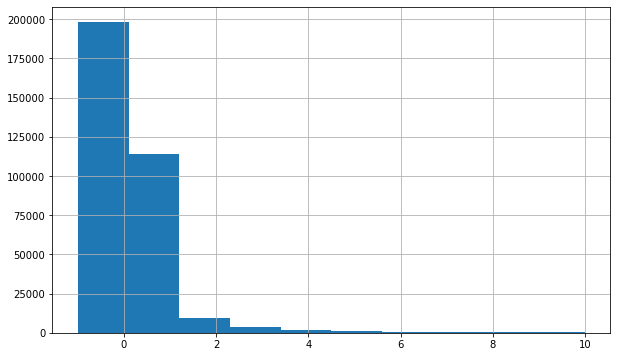

In [49]:
 # What explains such large inv?
compa[compa.inv<10].inv.hist()

#### Is Asset Growth Investment?

* See Cooper, Gulen, Schill, JF (2008);
* What is asset growth capturing other than investment? 
    * Mergers;
    * Issuance;
    * Spin-offs.
* Is it really investments that forecast future stock returns?

In [50]:
# A more traditional measure of investment: CAPX
compa['inv_capx'] = compa['capx']/compa['at_lag']
filter_inv_capx = (compa['capx']<=0)|(compa['at_lag']<=0)|(compa.fdiff>1)
compa.loc[filter_inv_capx,'inv_capx']=np.nan

<AxesSubplot:title={'center':"Apple's Investment"}, xlabel='fyear'>

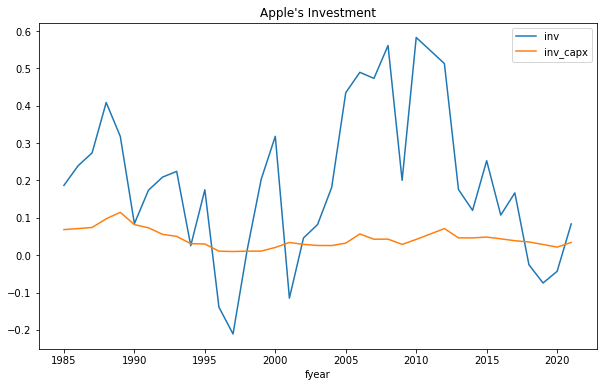

In [51]:
# Difference for Apple
compa.loc[(compa.gvkey=='001690')&
          (compa.fyear>=1985),['fyear','inv','inv_capx']
         ].set_index(['fyear']).plot(title="Apple's Investment") 

## Save Output

In [52]:
compa.columns

Index(['gvkey', 'datadate', 'conm', 'tic', 'cusip', 'fyear', 'fyr', 'at',
       'capx', 'ceq', 'cogs', 'csho', 'dlc', 'dlcch', 'dltt', 'dp', 'ib',
       'itcb', 'lt', 'mib', 'naicsh', 'ni', 'prstkcc', 'pstk', 'pstkl',
       'pstkrv', 're', 'revt', 'sale', 'seq', 'sich', 'txdb', 'txdi', 'txditc',
       'wcapch', 'xint', 'xlr', 'xrd', 'xsga', 'se', 'ps', 'dt', 'be', 'cost',
       'op', 'opbe', 'at_lag', 'inv', 'fdiff', 'inv_capx'],
      dtype='object')

In [53]:
compa.to_pickle(path='/Users/rk2941/Dropbox/courses/big_data_2022/lecture_outputs/compa_annual.pkl')

## For next class

**(FI)nance (RE)search Python Tools: fire_pytools**

* To make our lives easier, we will use a fire_pytools package.

* Written by our alumni, Lira Mota
    - Download the package [here](https://bitbucket.org/liramota/fire_pytools/src)

* This is a collection of useful functions in finance research.
    - Direct download of CRSP and Compustat from WRDS server
    - Direct download of Ken French data library
    - Portfolio sorts tools
    - Replicate Fama and French factors